# Úvod do strojového učení


### Úkol 0: 

Co si představujete pod pojmem strojové učení? 


### Ilustračení příklad na úvod - krajinka

Půjdeme na to od lesa a začneme příkladem. 

*Kód níže nás nebude zajímat, slouží jen vygenerování obrázku "krajinky" (pro milovníky matematiky funkce).* 

Představte si, že jste si najali zeměměřiče a vyslali ho do neznámé krajiny. Zadali jste mu souřadnice několika bodů (pro zjednodušení teď žijeme v jednorozměrném prostoru, souřadnice je tedy pouze jedno číslo) a on pro vás naměřil zeměpisnou výšku v těchto bodech.   

Naměřené body máte zobrazeny na obrázku, který jste obdrželi na hodině vytištěný od kouče, studujete-li doma, můžete si jej vytisknout (TODO: odkaz na pdf).

In [1]:
%matplotlib inline

#Tento kód můžeš ignorovat, slouží pouze k úpravě zobrazení. 

def wide():
    from IPython.core.display import HTML
    return HTML("""
    <script>
    var containers = document.querySelectorAll(\".container\");
    for (var i = 0; i < containers.length; i++) {
        containers[i].style.width = \"auto\";
        containers[i].style.marginLeft = \"1em\";
        containers[i].style.marginRight = \"5em\";
    }
    </script>""")

wide()

In [2]:
# importujeme knihovny jako obvykle
# s knihovnou numpy se setkáváme poprvé, slouží k numerickým výpočtům
# a potřebovat ji budeme minimálně (zde využíváme pouze hodnotu np.nan
# k vyplnění tabulky prázdnými/neznámými hodnotami)
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

plt.rcParams["figure.figsize"] = (60/3, 20/2)

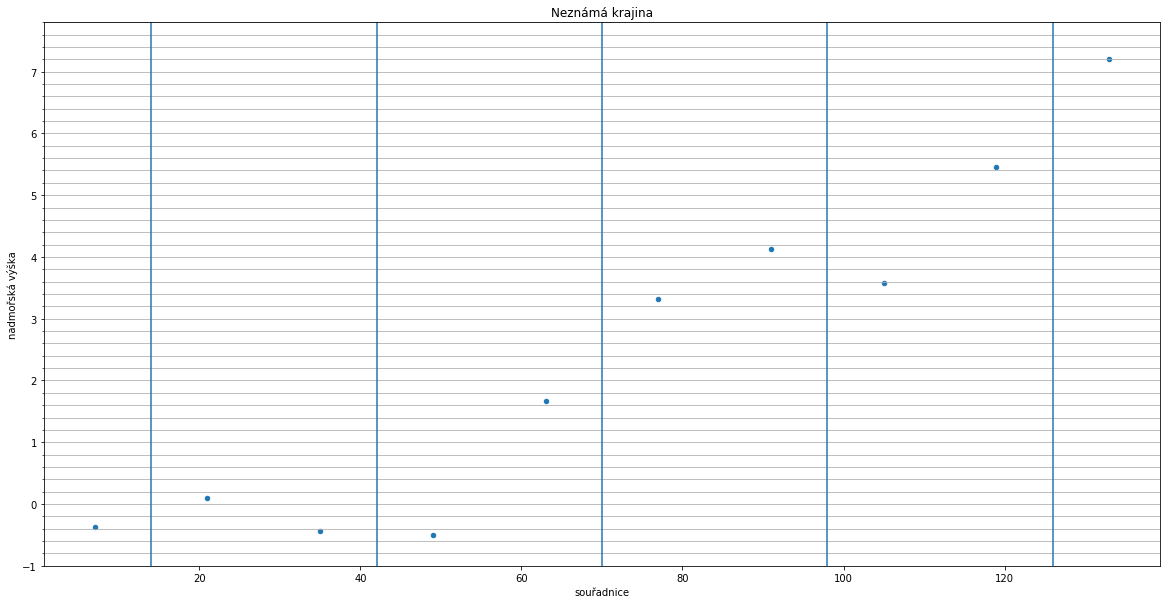

In [3]:
# kód v této buňce nám slouží k vygenerování krajiny a její zobrazování
# nečti jej, není v této hodině potřeba mu rozumět
# TODO: stejne kod prepsat a okomentovat 


ticks_per_1 = 5
#
TAJNE = 2.22

# TAJNE = 2 #TODO nezapomenout smazat tenhle radek, krajina na hodinu

TRAIN_START = 7
TRAIN_STEP = 14 

TEST_START = 1+13
TEST_STEP  = 14*2

lim = 140
def fn(x):
    x /= 10
    return TAJNE*TAJNE + math.sin(x) + math.cos(TAJNE*x) + 0.2/TAJNE * x**2 - 0.1**TAJNE * x**(5-TAJNE) -6

d = pd.DataFrame(index=range(0, lim))
d["y"] = pd.Series(d.index).apply(fn)
d["y_sample"] = d["y"].loc[TRAIN_START::TRAIN_STEP]
d["y_test"] = d["y"].loc[TEST_START::TEST_STEP]

d["x_sample"] = d.index
d.loc[d["y_sample"].isnull(), "x_sample"] = None
d["x_test"] = d.index
d.loc[d["y_test"].isnull(), "x_test"] = None

def nakresli_krajinku(df, predicted=None, plot_gold=True):
    ax = d.plot(x="x_sample", y="y_sample", kind="scatter")
    margin = 10 # nemusi se pak resit rozsah obrazku
    if plot_gold:
        ax = d["y"].loc[margin:len(d)-margin].plot()
    if predicted:
        ax = d[predicted].loc[margin:len(d)-margin].plot()
    for tst_val in d["x_test"]:
        ax.axvline(tst_val)
        if predicted and not tst_val != tst_val:
            ax.plot(
                [tst_val, tst_val],
                [d.loc[tst_val, "y"], d.loc[tst_val, predicted]],
                marker = '_', color="red", linestyle="-", linewidth=3
            )
 
    y_bottom, y_top = ax.get_ylim()
    ax.set_yticks([x/ticks_per_1 for x in range(int(y_bottom-1)*ticks_per_1, int(y_top+1)*ticks_per_1)], minor=True)
    ax.set_xlabel("souřadnice")
    ax.set_ylabel("nadmořská výška")
    ax.set_title("Neznámá krajina")
    ax.grid('on', which='both', axis='y')
    return ax

nakresli_krajinku(d, plot_gold=False)


Po naměření těchto bodů se zeměměřič rozhodl státi datovým analytikem,
přihlásil se na kurz od PyLadies a s měřením definivně skončil. 
Nás by ale zajímalo, jak by asi tak mohla celá krajina vypadat.

### Úkol 1:
Vezměte si tužku a zkuste si na výše uvedeném obrázku nakreslit 
krajinu tak, aby odpovídala měřením, která máme.
    
**Otázky:** 
+ Jsi si svým odhadem jistá? Existuje více možností, jak by mohla krajina vypadat?
+ Jak bys změřila (vyčíslila) kvalitu své schopnosti odhadovat krajinky?  
+ Podívej se na krajinku své sousedky. Zamysli se nad tím, jak by se dalo určit, která z vás krajinku vystihla lépe.

Teď se podíváme jak neznámá krajina vypadá. (Pokud právě sedíš na kurzu, nezapomeň opravit hodnotu proměnné TAJNE dle instrukce kouče, abys dostala obrázek odpovídající tomu, který máš vytištěný.)

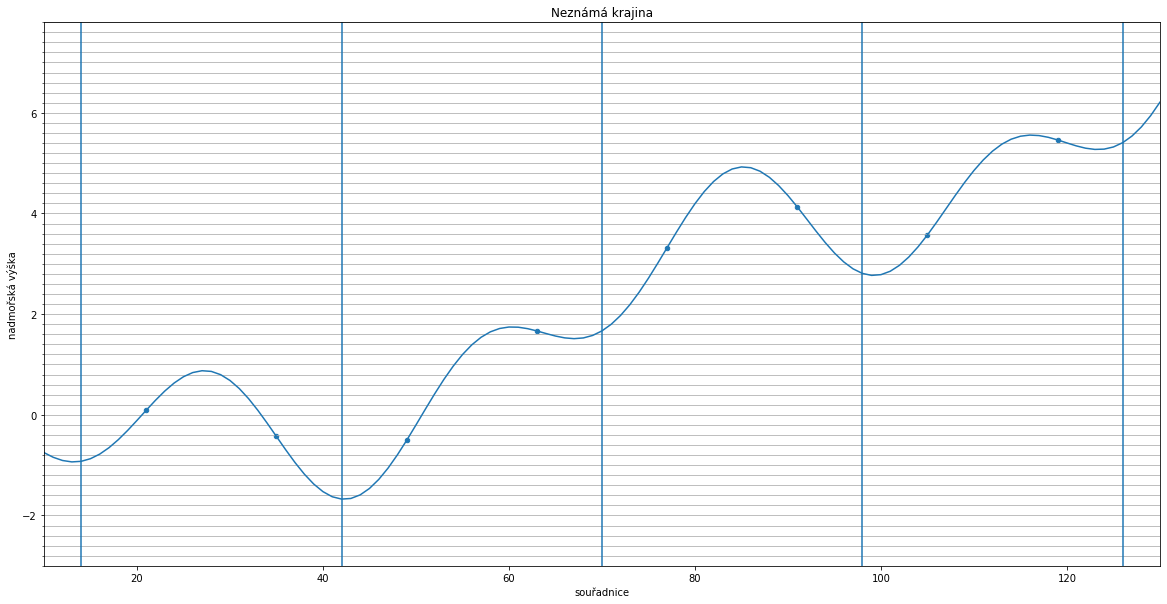

In [4]:
nakresli_krajinku(d)

### Úkol 2:

Pomocí mřížky na obrázku odečti body ze své krajinky v bodech vyznačených modrou čarou a doplň do tabulky v následujícím kódu.

Dobrá zpráva je, že výšku krajinky v těchto bodech přeci jen známe (předvídavě jsme tyto body nechali stranou). Hodnoty najdeš ve sloupečku `"x_test"` a `"y_test"` DataFramu `d`. TODO: pojmenovat krajina 

Napiš funkci, která vyhodnotí, jak moc byl odhad tvé krajinky úspěšný.

+ Použij svoji metriku a urči, zda je z tvého pohledu úspěšný tvůj nebo sousedčin odhad.
+ Zatím víš jen, jestli si lepší než sousedka nebo ne. Ale jak určit, zda schopnost člověka odhadnout krajinku za něco stojí nebo ne?

In [5]:
__ = None  # pouze proto, aby kód byl syntakticky správně
d["můj_odhad"] = np.nan
d["můj_odhad"].loc[TEST_START::TEST_STEP]= [ __, __, __, __, __] # doplň čísla 

def moje_metrika(y_true, y_pred):
    """ Funkce vyhodnotí úspěšnost predikce krajinky (funkce). 
    y_true jsou skutečné hodnoty, y_pred jsou predikované hodnoty.
    """
    ...
    
# TODO dopsat pomocnou funkci, aby mohli uvazovat ze y_true a y_pred
# jsou jen floaty 

Zkusíme vzít hloupý odhad a podívat se, jestli je naše řešení lepší. 

TODO: presentace, nevyvážená data, model který funguje jako náhoda (vedlejší ntb/presentace)

In [6]:
mean_value = d["y_sample"].mean()
d["jednoduchý_odhad"] = np.nan
d["jednoduchý_odhad"].loc[TEST_START::TEST_STEP] = mean_value

moje_metrika(d["y_test"], d["jednoduchý_odhad"])

/home/petra/datacourse_env/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Teď přichází jediná dobrá zpráva z dnešní lekce. **Strojové učení** (machine learning) nabízí metody (algoritmy), které dokáží méně či více úspěšně provést obdobný odhad (nejen) krajinky za tebe. 

Představ si tuto metodu jako *černou krabičku*, která má nějaké vstupy a nějaké výstupy. Takové krabičce se říká **model**. Do vstupů můžeš sypat čísla a krabička na výstupu bude chrlit odpovědi (také čísla). V případě krajinky zadáš souřadnici a krabička ti prozradí, jaká je v daném bodě nadmořská výška. Souřadnice, které jdou na vstup *krabičky* (modelu), označujeme jako příznaky (**features**) nebo vstupní proměnné, regressory. Na výstupu je nějaká odezva (závislá proměnná). 

![černá skříňka](static/blackbox.jpeg)

TODO: dokreslit krabičce vstupy a výstupy

Samozřejmě krabička nemůže sama od sebe vědět, zda se ptáš na krajinu v Krkonoších nebo v Polabí. Proto je třeba krabičku nejprve naučit (natrénovat, nafitovat) na úkol, který po ní budeme požadovat. 
Krabička to zvládne sama, my ji jen musíme poskynout dostatečné množství příkladů (trénovacích vzorů) souřadnic a odpovídajícíh výšek. Takovému učení, kde jsou k dispozici správné odpovědi, se říká **supervised learning**, česky **učení s učitelem**.  

Pojďme si několik krabiček vyzkoušet. Využijeme knihovnu [scikit-learn](https://scikit-learn.org/). Knihovna poskytuje nejen velké množství různých chytrých krabiček, ale také výbornou [dokumentaci](https://scikit-learn.org/stable/user_guide.html), kterou doporučujeme k následnému samostudiu a experimentování. V příští hodině projdeme nejdůležitější funkce, které budeš potřebovat.

In [7]:
# Importujeme knihovnu scikit-learn 
import sklearn



Níže je funkce `vyhodnost_krabicku`, která černou krabičku natrénuje na naši krajinku a ohodnotí testovací body. 
Druhá funkce `zobraz_vysledek` nám všechno vykreslí a vypíše hodnoty a chyby v jednotlivých bodech.

Kód sám o sobě není v tuto chvíli důležitý, dnes nás nezajímá syntaxe, stačí když se budeš dívat na výsledné obrázky.

In [8]:
def vyhodnot_krabicku(df_, CernaKrabicka, **kwargs):
    df = df_.copy()
    X = df[["x_sample"]].dropna()
    y = df["y_sample"].dropna()
    X /= 140 
    cerna_krabicka = CernaKrabicka(**kwargs).fit(X, y)
    return cerna_krabicka.predict(pd.DataFrame(df.index)/140)
    
def zobraz_vysledek(df_, sloupec):
    df = df_.copy()
    ax = nakresli_krajinku(df, predicted=sloupec)
    seznam_chyb = []
    for tst_val in d["x_test"].dropna():
        seznam_chyb.append([d.loc[tst_val, "y"], d.loc[tst_val, sloupec]])
    for spravne, predpoved in seznam_chyb:
        print(f"Správně bylo {spravne:+2.1f}, předpovězeno {predpoved:+2.1f}. Absolutní chyba je {predpoved-spravne:+2.1f}.")
    return ax


    

# První černá krabička

In [9]:
from sklearn.linear_model import LinearRegression as CernaKrabicka

Správně bylo -0.9, předpovězeno -1.0. Absolutní chyba je -0.1.
Správně bylo -1.7, předpovězeno +0.7. Absolutní chyba je +2.4.
Správně bylo +1.7, předpovězeno +2.4. Absolutní chyba je +0.7.
Správně bylo +2.8, předpovězeno +4.1. Absolutní chyba je +1.3.
Správně bylo +5.4, předpovězeno +5.8. Absolutní chyba je +0.4.


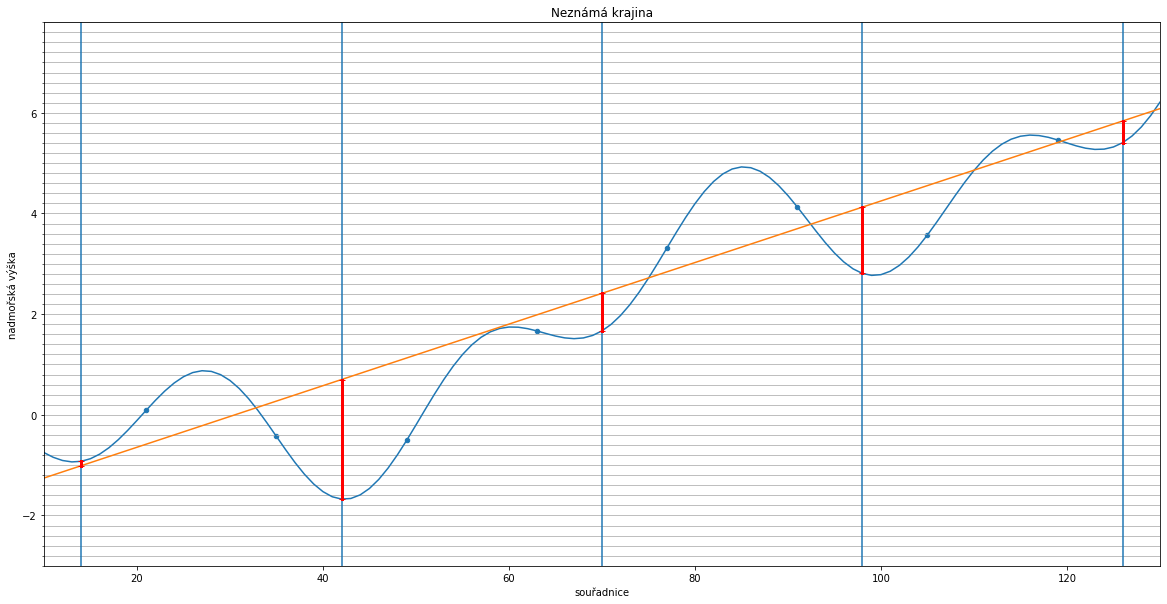

In [10]:
i = 1
d[f"predikce_krabickou_{i}"] = vyhodnot_krabicku(d, CernaKrabicka)
zobraz_vysledek(d, f"predikce_krabickou_{i}");

### Úkol 3:

Ohodnoť kvalitu odhadu černé krabičky pomocí metriky, kterou jsi navrhla v úkolu 2. Je tvůj odhad lepší? 

In [11]:
#  kód k úkolu 3 

# Další černé krabičky

Zkusme ještě další krabičky. Prohlédni si pozorně obrázky, pokud zbývá čas, můžeš si vyzkoušet, zda hodnocení výsledků tvojí metrikou je podobné jako visuální dojem.

/home/petra/datacourse_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Správně bylo -0.9, předpovězeno -0.3. Absolutní chyba je +0.6.
Správně bylo -1.7, předpovězeno -0.5. Absolutní chyba je +1.2.
Správně bylo +1.7, předpovězeno +2.8. Absolutní chyba je +1.2.
Správně bylo +2.8, předpovězeno +4.0. Absolutní chyba je +1.2.
Správně bylo +5.4, předpovězeno +5.3. Absolutní chyba je -0.1.


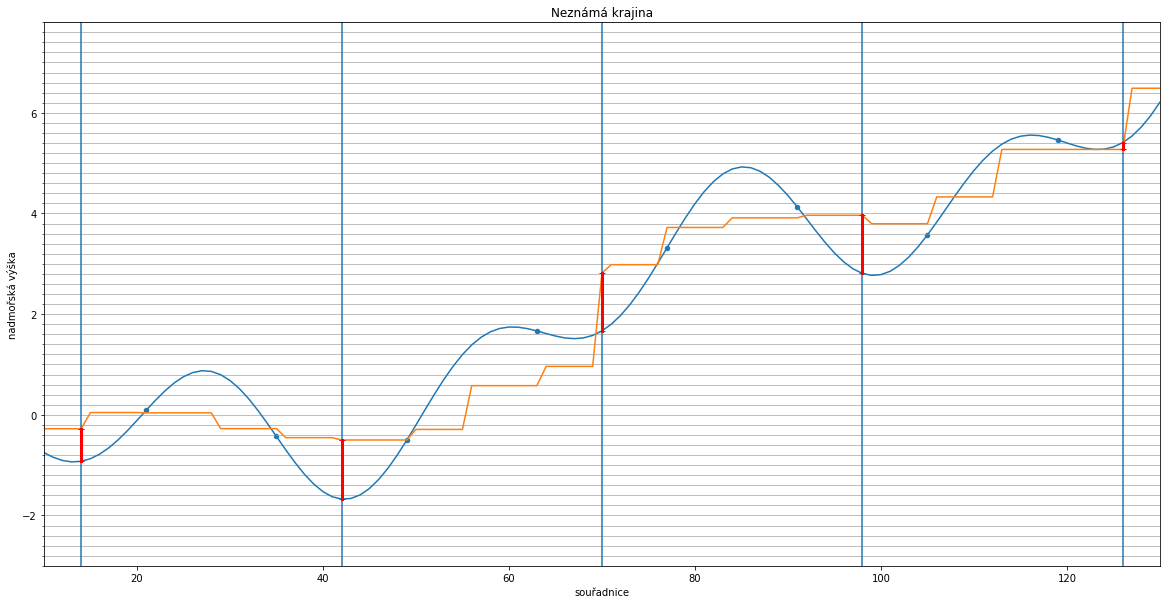

In [12]:
from sklearn.ensemble import RandomForestRegressor as CernaKrabicka

i = 2
d[f"predikce_krabickou_{i}"] = vyhodnot_krabicku(d, CernaKrabicka)
zobraz_vysledek(d, f"predikce_krabickou_{i}");

/home/petra/datacourse_env/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Správně bylo -0.9, předpovězeno +0.7. Absolutní chyba je +1.6.
Správně bylo -1.7, předpovězeno +1.4. Absolutní chyba je +3.0.
Správně bylo +1.7, předpovězeno +2.2. Absolutní chyba je +0.5.
Správně bylo +2.8, předpovězeno +3.1. Absolutní chyba je +0.3.
Správně bylo +5.4, předpovězeno +3.7. Absolutní chyba je -1.7.


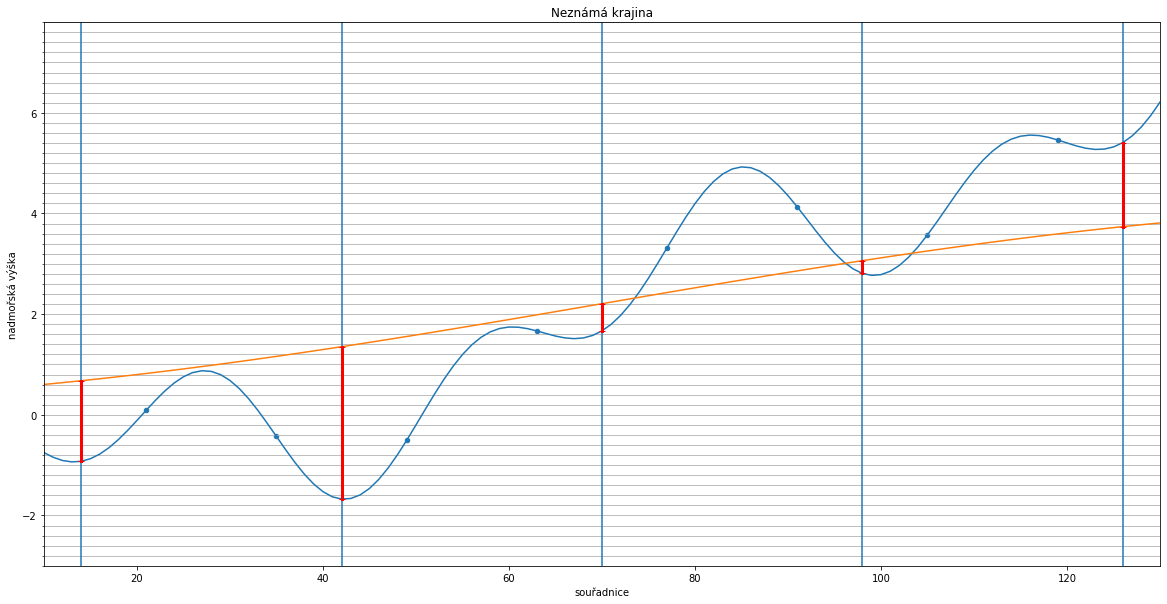

In [13]:
from sklearn.svm import SVR as CernaKrabicka

i=3.1
d[f"predikce_krabickou_{i}"] = vyhodnot_krabicku(d, CernaKrabicka)

zobraz_vysledek(d, f"predikce_krabickou_{i}")

Správně bylo -0.9, předpovězeno -0.6. Absolutní chyba je +0.3.
Správně bylo -1.7, předpovězeno +0.1. Absolutní chyba je +1.8.
Správně bylo +1.7, předpovězeno +2.3. Absolutní chyba je +0.7.
Správně bylo +2.8, předpovězeno +4.2. Absolutní chyba je +1.3.
Správně bylo +5.4, předpovězeno +6.2. Absolutní chyba je +0.8.


/home/petra/datacourse_env/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


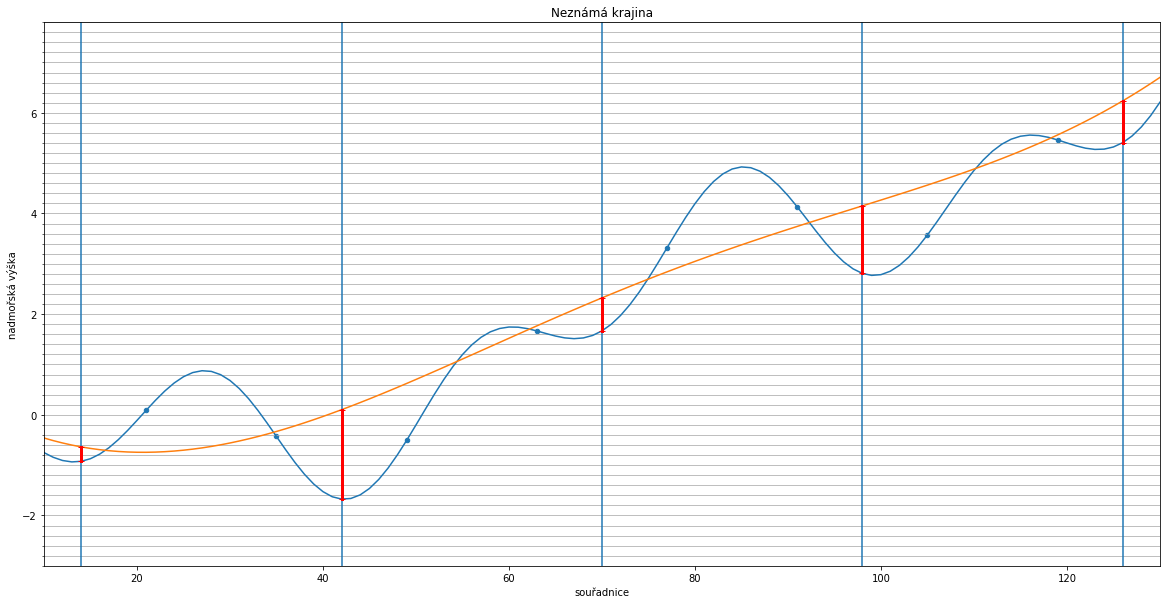

In [14]:
from sklearn.svm import SVR as CernaKrabicka

i=3.2
d[f"predikce_krabickou_{i}"] = vyhodnot_krabicku(d, CernaKrabicka, C=10000)
zobraz_vysledek(d, f"predikce_krabickou_{i}")

[-13428.6010542   29136.45696714   7087.08456531 -55705.09904045
  18925.2848048   29559.56620911  17410.0477292  -72039.88628927
  50205.85478977 -11177.51434624]
Správně bylo -0.9, předpovězeno -0.1. Absolutní chyba je +0.9.
Správně bylo -1.7, předpovězeno -0.4. Absolutní chyba je +1.3.
Správně bylo +1.7, předpovězeno +2.3. Absolutní chyba je +0.6.
Správně bylo +2.8, předpovězeno +4.2. Absolutní chyba je +1.4.
Správně bylo +5.4, předpovězeno +5.8. Absolutní chyba je +0.4.


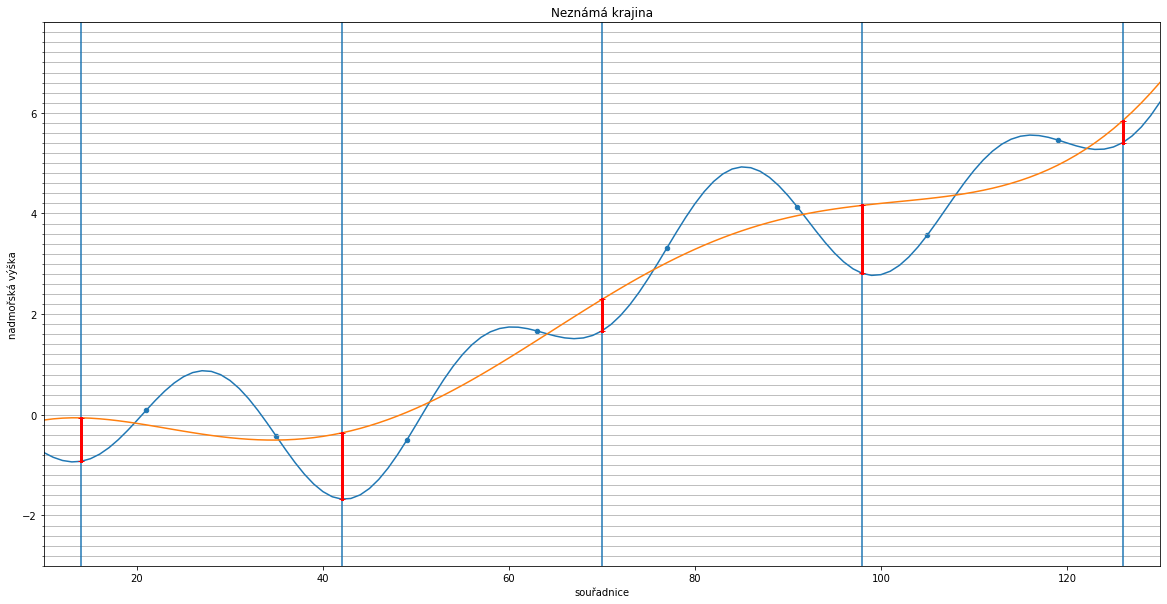

In [15]:
from utils import SimpleRegressor as CernaKrabicka

i = 3
d[f"predikce_krabickou_{i}"] = vyhodnot_krabicku(d, CernaKrabicka, C=0.00001)

zobraz_vysledek(d, f"predikce_krabickou_{i}")

#from sklearn.dummy import DummyRegressor as CernaKrabicka
#d["predikce_treti_krabickou"] = vyhodnot_krabicku(d, CernaKrabicka)
#obraz_vysledek(d, "predikce_treti_krabickou")

[-0.36870878  0.09140818 -0.43087103 -0.50844846  1.66553785  3.31668031
  4.12875716  3.57042459  5.45726688  7.19597426]
Správně bylo -0.9, předpovězeno -0.0. Absolutní chyba je +0.9.
Správně bylo -1.7, předpovězeno -0.1. Absolutní chyba je +1.5.
Správně bylo +1.7, předpovězeno +0.7. Absolutní chyba je -1.0.
Správně bylo +2.8, předpovězeno +1.0. Absolutní chyba je -1.8.
Správně bylo +5.4, předpovězeno +1.7. Absolutní chyba je -3.7.


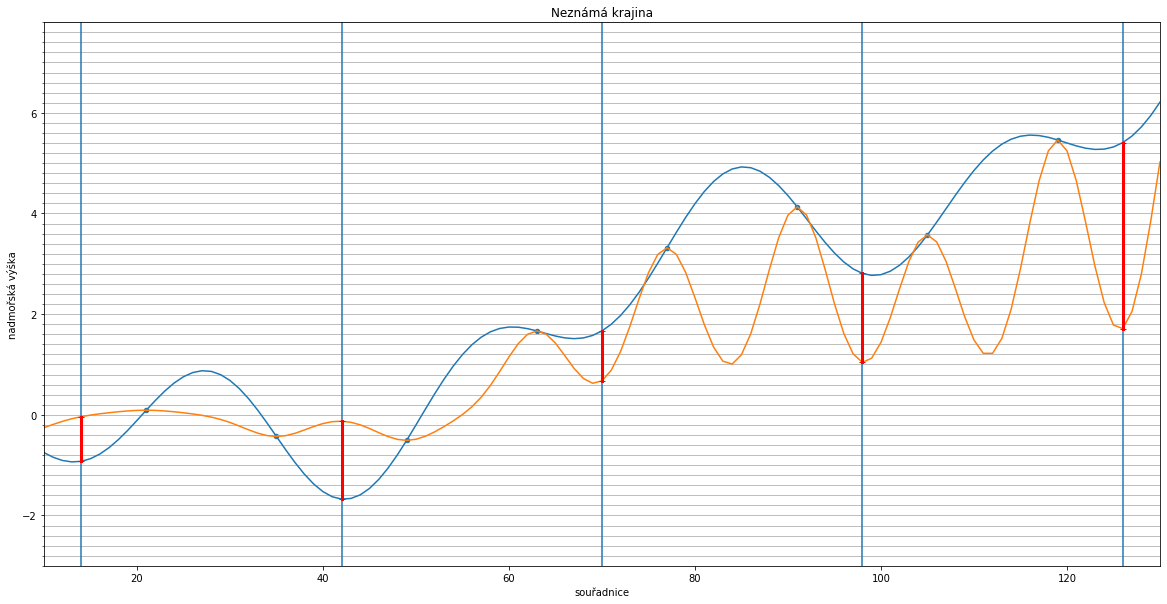

In [16]:
i = 4
d[f"predikce_krabickou_{i}"] = vyhodnot_krabicku(d, CernaKrabicka, beta=800.)
zobraz_vysledek(d, f"predikce_krabickou_{i}")

Správně bylo -0.9, předpovězeno +2.0. Absolutní chyba je +2.9.
Správně bylo -1.7, předpovězeno +2.0. Absolutní chyba je +3.6.
Správně bylo +1.7, předpovězeno +2.4. Absolutní chyba je +0.8.
Správně bylo +2.8, předpovězeno +2.6. Absolutní chyba je -0.2.
Správně bylo +5.4, předpovězeno +3.0. Absolutní chyba je -2.4.


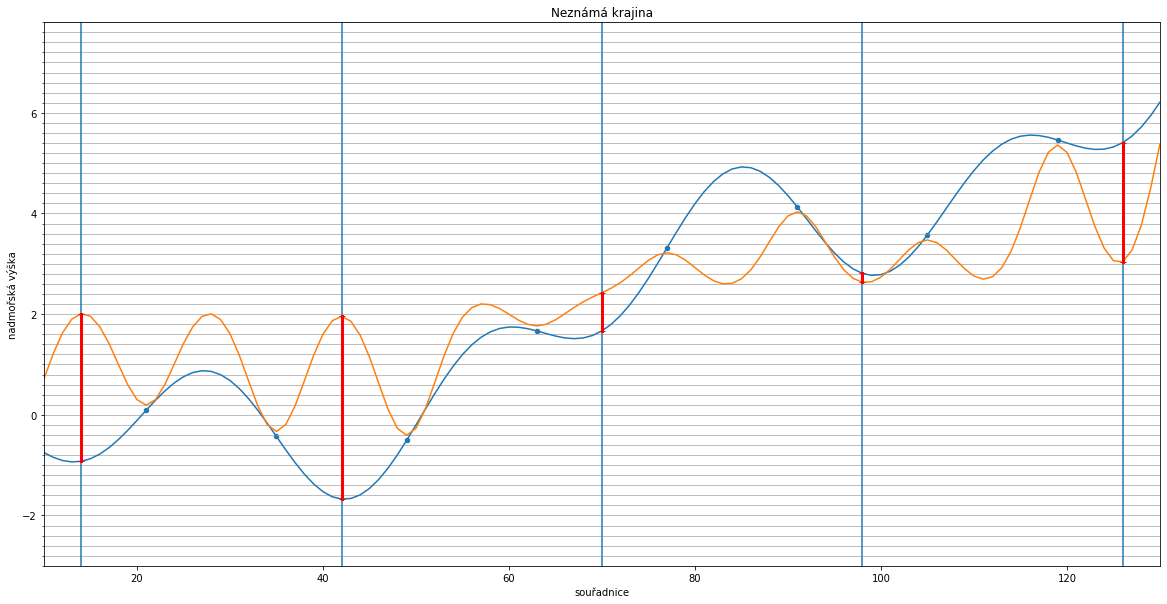

In [17]:
from sklearn.svm import SVR as CernaKrabicka

i = 5
d[f"predikce_krabickou_{i}"] = vyhodnot_krabicku(d, CernaKrabicka, gamma=1000., C=10000)
zobraz_vysledek(d, f"predikce_krabickou_{i}")

In [18]:
# TODO: doladit výběr krabiček, aby tam byl příklad kdy to vypadá hezky a příklad, kde jsou TS body OK, ale jinak to lítá
# krabicky z utils spis nechcem, chteli jsme to vyzkouset (pripadne jen ty polynomy)


Poslední příklad ilustruje užitečnost **testovací množiny**. Vzorkům, na kterých model (černou krabičku) učíme, obvykle 
říkáme **trénovací množina**. Vzorkům, které si necháme stranou, **testovací množina**. [Pozn. pro kouče: příští hodinu 
upřesníme, přibudou evaluační data] 


## Úkol 4:

 - Který z modelů krajiny se ti nejvíce líbí? 
 - Jaké jsou asi výhody a nevýhody jednotlivých modelů?
 - Všimni si posledního obrázku. Jak ohodnotí tvá metrika výsledek, použiješ-li hodnoty v bodech trénovací množiny? Jak dopadne na testovací množině?

Situaci, kdy model dává správnou odezvu pro data z **trénovací množiny**, ale špatně odhaduje vzory, které během učení nebyly k dispozici, říkáme **přeučení** (**overfitting**). Podobně jako když se student naučí vzorové odpověďi zpaměti, ale nepochopí zákonitosti (neumí **generalizovat**). 
Opačná situace se označuje jako **underfitting**, což je např. použití přímky (lineární regrese) k modelování zvlněné krajiny (nelineární funkce). 

TODO: přidat sem obrázek  underfiting - good fit - overfitting (jenom ručně nakreslenej)






 ## Zpět ke dvoum dimenzím

In [19]:
# TODO

Zobecníme si příklad na krajinu, kde se souřadnice zadávají zeměpisnou šířkou a dékou.

TODO: Roman? kratší příklad

## Hyper-parametry 

U příkladů výše jsme funkci `vyhodnot krabicku` předávali data a krabičku (model). Několikrát jsme si ale trochu pomohli a předali jsme tiše ještě nějaké další parametry.  Krabička totiž často umožňuje uživateli, aby si ji nakonfiguroval. V terminologii krabiček si můžeme představit, že krabička má na sobě různé páčky, kterými se dá seřídit. Těmito páčkami se nastavují tzv. **hyper-parametry** modelu. Všechny modely, které najdeš v knihovně Scikit-learn, mají nějaké defaultní nastavení a půjdou použít i bez toho, aby ses nastavením těchto **hyper-parametrů** zabývala.  
V případě, že model nedává uspokojivý výsledek, můžeš zkusit tyto parametry upravit, např. vyzkoušet několik různých nastavení a porovnat hodnotu metriky na testovací množině.  
K problému hledání vhodných **hyper-parametrů** se vrátíme na začátku příští hodiny. 

Pokud budeš pokračovat samostudiem, výběr vhodného modelu a nastavení jeho hyperparametrů se skrývá pod klíčovým slovem **model selection**. Knihovna Scikit-learn poskytuje nástroje, jak si toto hledání automatizovat. *(TODO: Pozn. tohle bych ale asi dala do další hodiny, až se bude řešit ta evaluační množina).*